<a href="https://colab.research.google.com/github/Talha1818/Machine-Learning-Python-Notebooks/blob/master/Extract_Dates_TransData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install dateparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 KB 19.4 MB/s eta 0:00:00


In [3]:
from PIL import Image
import numpy as np
import datetime
import re
from dateparser import parse

In [4]:
# !pip install google-cloud-vision Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.3/444.3 KB 5.3 MB/s eta 0:00:00


In [6]:
import os
import io
import cv2
import numpy as np
from PIL import Image
from base64 import b64decode
from google.cloud import vision
from os import environ
from io import BytesIO

In [ ]:
file1 = Image.open('/content/dates.jfif')
file2 = Image.open('/content/images.jfif')

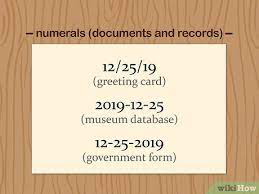

In [ ]:
file1

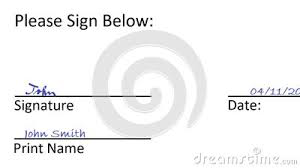

In [ ]:
file2

In [11]:
# file3 = Image.open('/content/PA2_TSA2023.png')

In [8]:
from google.cloud.vision_v1 import types
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file('/content/GOOGLE_OCR.json')
client = vision.ImageAnnotatorClient(credentials=credentials)

In [9]:
def get_text(file, credentials, client):
  imageCV = cv2.cvtColor(np.array(file), cv2.COLOR_RGB2BGR)
  success, encodedImage = cv2.imencode('.png', imageCV)
  content2 = encodedImage.tobytes()
  imageCV2 = vision.Image(content=content2)
  response = client.text_detection(image=imageCV2)
  text = response.text_annotations[0].description
  return text 

In [ ]:
import re
from datetime import datetime

def find_date(text):
    # Define the regular expression pattern
    regex = r"(\d{1,2})\/(\d{1,2})\/(\d{2,4})"
    
    # Match the regular expression with the input string
    match = re.search(regex, text)
    print("*"*100)
    print(f"\t\tMatching Date: {match.group(0)}")
    print("*"*100)

    
    # Extract the month, day, and year values from the matched string
    month = int(match.group(1))
    day = int(match.group(2))
    year = int(match.group(3))
    
    # Check if the year value is two digits
    if len(str(year)) == 2:
        # Add the full year based on the assumption that the year is within 50 years from the current year
        current_year = datetime.now().year
        if year <= current_year % 100:
            year += 2000
        else:
            year += 1900
    
    # Check if the month value is valid
    if month < 1 or month > 12:
        print("❌ Invalid month value:", month)
        date = None
    else:
        # Create a datetime object from the extracted values
        # date = datetime(year, month, day)
        date = f"{month}/{day}/{year}"
    return date


In [ ]:
text = get_text(file1, credentials, client)
print(text)
get_date1 = find_date(text)
print(get_date1)

numerals (documents and records) -
12/25/19
(greeting card)
2019-12-25
(museum database)
12-25-2019
(government form)
wikiHow
****************************************************************************************************
		Matching Date: 12/25/19
****************************************************************************************************
12/25/2019


In [ ]:
text = get_text(file2, credentials, client)
print(text)
get_date2 = find_date(text)
print(get_date2)

Please Sign Below:
Signature
John Smith
Print Name
04/11/20
Date:
dreamstime.com
****************************************************************************************************
		Matching Date: 04/11/20
****************************************************************************************************
4/11/2020


In [ ]:
import re
from datetime import datetime

def check_valid_date(date_str, closing_date_str):
    print(f"\t\tDate: {date_str}")
    print(f"\t\tClosing Date: {closing_date_str}")
    print()
    # Convert closing date string to datetime object
    closing_date = datetime.strptime(closing_date_str, '%m/%d/%Y')
    # Match the date string with a regular expression
    date_regex = r"(\d{1,2})[/-](\d{1,2})[/-](\d{2,4})"
    match = re.match(date_regex, date_str)
    # print(match)
    if not match:
        print("❌ Invalid date format.")
        return False
    # Extract the month, day, and year values from the matched string
    month = int(match.group(1))
    day = int(match.group(2))
    year = int(match.group(3))
    # Check if the date is from a previous year
    if year < closing_date.year:
        print("❌ Date is from a previous year.")
        return False
    # Check if the month value is valid
    if month < 1 or month > 12:
        print("❌ Invalid month value:", month)
        return False
    # Check if the day value is valid
    max_days = 31
    if month in [4, 6, 9, 11]:
        max_days = 30
    elif month == 2:
        if year % 4 == 0 and (year % 100 != 0 or year % 400 == 0):
            max_days = 29
        else:
            max_days = 28
    if day < 1 or day > max_days:
        print("❌ Invalid day value:", day)
        return False
    # Convert date string to datetime object
    date = datetime(year, month, day)
    # Check if the date is past the closing date
    if date > closing_date:
        print("❌ Date is past the closing date.")
        return False
    # Date is valid
    print("✅ Passed")
    return True

In [ ]:
date_str = "12/13/2023"
closing_date_str = "05/15/2023"
valid = check_valid_date(date_str, closing_date_str)

		Date: 12/13/2023
		Closing Date: 05/15/2023

❌ Date is past the closing date.


In [ ]:
date_str = get_date1
closing_date_str = "12/27/2019"

valid = check_valid_date(date_str, closing_date_str)

		Date: 12/25/2019
		Closing Date: 12/27/2019

✅ Passed


In [ ]:
date_str = get_date2
closing_date_str = "12/27/2025"

valid = check_valid_date(date_str, closing_date_str)

		Date: 4/11/2020
		Closing Date: 12/27/2025

❌ Date is from a previous year.
